In [177]:
namedic = {'CLK4':'CHEMBL4203_Ki', '5-HT1A': 'CHEMBL214_Ki'}

In [178]:
from glob import glob
import pandas as pd
import json
import pandas as pd
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt
from statannot import add_stat_annotation


sns.set(style='white',  font='sans-serif', font_scale=2)

In [179]:
pwd

'/home/shenwanxiang/Research/bidd-clsar/experiment/03_HSSMS_performance'

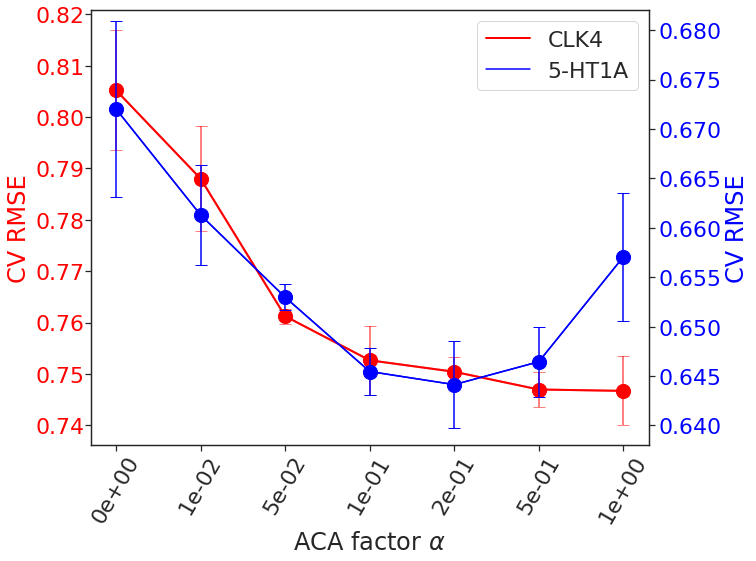

In [180]:
dfclk4 = pd.read_csv('./benchmark_performance/mae_aca_opt_cliff/CHEMBL4203_Ki/alpha_performance.csv', index_col=0)
df5ht1a = pd.read_csv('./benchmark_performance/mae_aca_opt_cliff/CHEMBL214_Ki/alpha_performance.csv', index_col=0)


dfclk4.alpha = dfclk4.alpha.apply(lambda x:'%.e' % float(x))
df5ht1a.alpha = df5ht1a.alpha.apply(lambda x:'%.e' % float(x))


fig, ax1 = plt.subplots(figsize=(10, 8))

ax2 = ax1.twinx()
c1 = 'red'
c2 = 'blue'


line2 = ax2.plot(df5ht1a.alpha, df5ht1a.rmse, color = c2, label = '5-HT1A')
ax2.scatter(df5ht1a.alpha, df5ht1a.rmse, c= c2,  s=200, alpha = 1)
ax2.errorbar(df5ht1a.alpha, df5ht1a.rmse, yerr=df5ht1a.rmse_err, capsize = 6, ecolor=c2, color = c2)
ax2.set_ylabel('CV RMSE', color = c2)
ax2.tick_params(axis ='y', labelcolor = c2)
ax2.set_ylim(0.638, 0.682)


line1 = ax1.plot(dfclk4.alpha, dfclk4.rmse, color = c1, label = 'CLK4', lw=2,)
ax1.scatter(dfclk4.alpha, dfclk4.rmse, c=c1, s=200, alpha = 1) #cmap='Reds', 
ax1.errorbar(dfclk4.alpha, dfclk4.rmse, yerr=dfclk4.rmse_err, capsize = 6, ecolor=c1, color = c1, lw=2, alpha = 0.5)




ax1.set_xlabel(r'ACA factor $\alpha$')
ax1.set_ylabel('CV RMSE', color = c1)
ax1.tick_params(axis ='y', labelcolor = c1)

ax1.tick_params(left='off',  bottom='off', pad=.5,)

ax1.tick_params(axis='x', labelrotation=60)

lns = line1 + line2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)

fig.savefig('./benchmark_performance/clk4_5ht1a_alpha.pdf', bbox_inches='tight', dpi=400) 

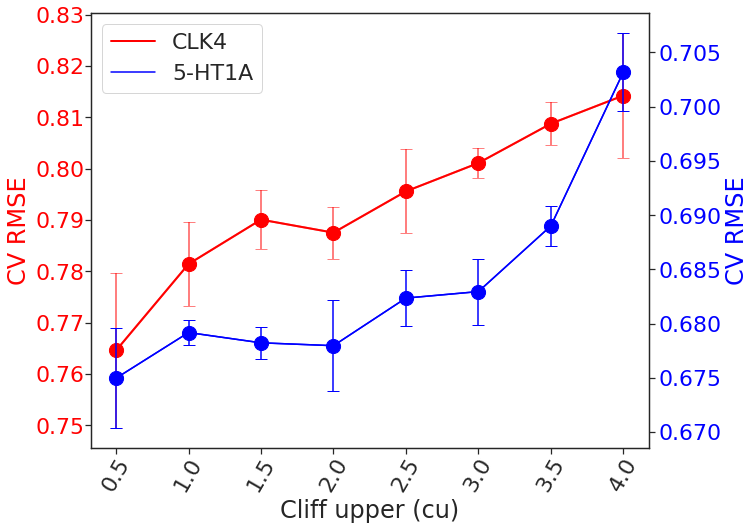

In [181]:
dfclk4 = pd.read_csv('./benchmark_performance/mae_aca_opt_cliff/CHEMBL4203_Ki/cliff_performance.csv', index_col=0)
df5ht1a = pd.read_csv('./benchmark_performance/mae_aca_opt_cliff/CHEMBL214_Ki/cliff_performance.csv', index_col=0)

dfclk4 = dfclk4[dfclk4.cl == 0.1]
df5ht1a = df5ht1a[df5ht1a.cl == 0.1]



fig, ax1 = plt.subplots(figsize=(10, 8))

ax2 = ax1.twinx()


line2 = ax2.plot(df5ht1a.cu, df5ht1a.rmse, color = c2, label = '5-HT1A')
ax2.scatter(df5ht1a.cu, df5ht1a.rmse, c= c2,  s=200, alpha = 1)
ax2.errorbar(df5ht1a.cu, df5ht1a.rmse, yerr=df5ht1a.rmse_err, capsize = 6, ecolor=c2, color = c2)
ax2.set_ylabel('CV RMSE', color = c2)
ax2.tick_params(axis ='y', labelcolor = c2)
#ax2.set_ylim(0.638, 0.682)


line1 = ax1.plot(dfclk4.cu, dfclk4.rmse, color = c1, label = 'CLK4', lw=2,)
ax1.scatter(dfclk4.cu, dfclk4.rmse, c=c1, s=200, alpha = 1) #cmap='Reds', 
ax1.errorbar(dfclk4.cu, dfclk4.rmse, yerr=dfclk4.rmse_err, capsize = 6, ecolor=c1, color = c1, lw=2, alpha = 0.5)



ax1.set_xlabel(r'Cliff upper (cu)')
ax1.set_ylabel('CV RMSE', color = c1)
ax1.tick_params(axis ='y', labelcolor = c1)

ax1.tick_params(left='off',  bottom='off', pad=.5,)

ax1.tick_params(axis='x', labelrotation=60)

lns = line1 + line2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)

fig.savefig('./benchmark_performance/clk4_5ht1a_cu.pdf', bbox_inches='tight', dpi=400) 

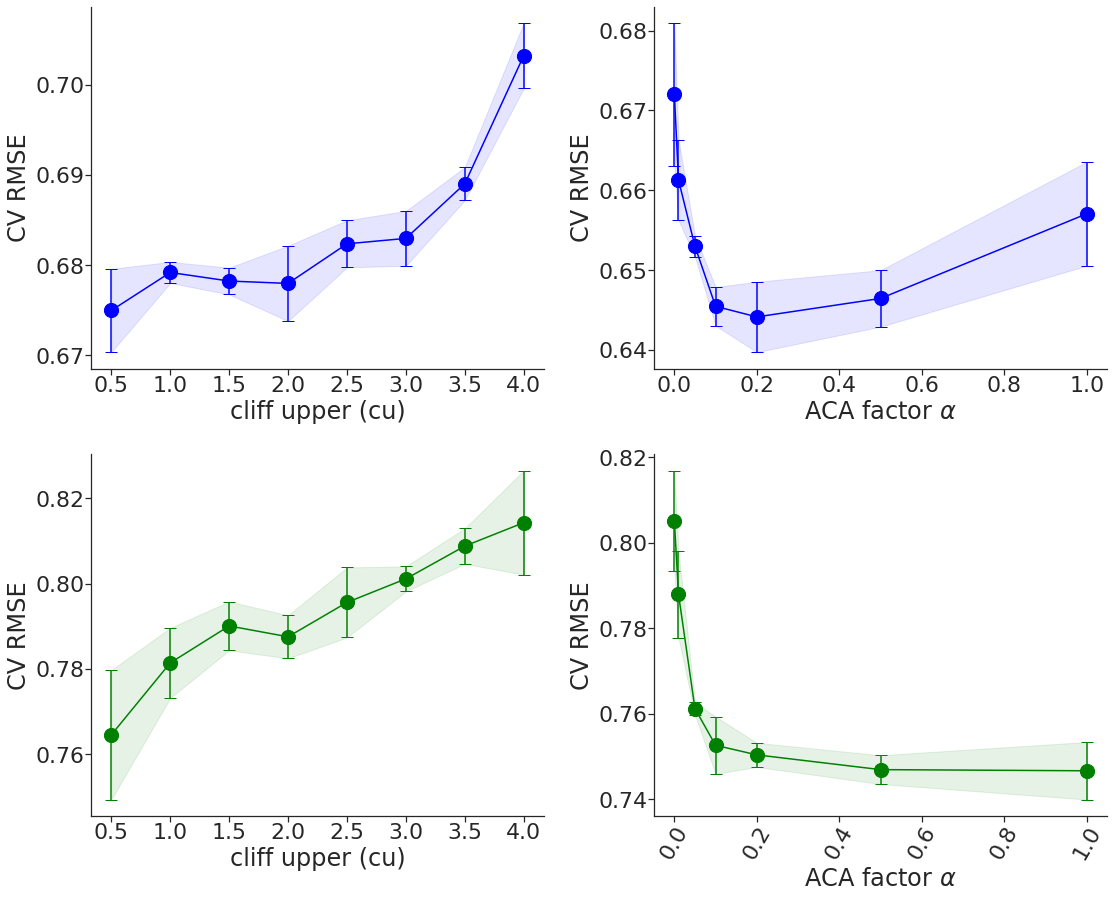

In [186]:
df1 = pd.read_csv('./benchmark_performance/mae_aca_opt_cliff/CHEMBL214_Ki/alpha_performance.csv', index_col=0)
df2 = pd.read_csv('./benchmark_performance/mae_aca_opt_cliff/CHEMBL4203_Ki/alpha_performance.csv', index_col=0)

df3 = pd.read_csv('./benchmark_performance/mae_aca_opt_cliff/CHEMBL214_Ki/cliff_performance.csv', index_col=0)
df4 = pd.read_csv('./benchmark_performance/mae_aca_opt_cliff/CHEMBL4203_Ki/cliff_performance.csv', index_col=0)


df3 = df3[df3.cl == 0.1]
df4 = df4[df4.cl == 0.1]



fig, axes = plt.subplots(2,2, figsize=(16, 13), )
(ax3, ax1), (ax4, ax2) = axes

c1 = 'green'
c2 = 'blue'


ax1.scatter(df1.alpha, df1.rmse, c=c2, s=200, alpha = 1) #c=df1.rmse, cmap='cool',
ax1.errorbar(df1.alpha, df1.rmse, yerr=df1.rmse_err, capsize = 6, ecolor=c2, color = c2)

ax1.fill_between(df1.alpha, df1.rmse-df1.rmse_err, df1.rmse+df1.rmse_err, color = c2, alpha = 0.1)

ax1.set_xlabel(r'ACA factor $\alpha$')
ax1.set_ylabel('CV RMSE')
ax1.tick_params(left='off',  bottom='off', pad=.5,)

ax1.tick_params(axis='x')
sns.despine(top=True, right=True, left=False, bottom=False)



ax2.scatter(df2.alpha, df2.rmse, c=c1, s=200, alpha = 1)
ax2.errorbar(df2.alpha, df2.rmse, yerr=df2.rmse_err, capsize = 6, ecolor=c1, color = c1)
ax2.fill_between(df2.alpha, df2.rmse-df2.rmse_err, df2.rmse+df2.rmse_err, color = c1, alpha = 0.1)
ax2.set_xlabel(r'ACA factor $\alpha$')
ax2.set_ylabel('CV RMSE')
ax2.tick_params(left='off',  bottom='off', pad=.5,)

ax2.tick_params(axis='x', labelrotation=60)




ax3.scatter(df3.cu, df3.rmse, c=c2, s=200, alpha = 1)
ax3.errorbar(df3.cu, df3.rmse, yerr=df3.rmse_err, capsize = 6, ecolor=c2, color = c2)
ax3.fill_between(df3.cu, df3.rmse-df3.rmse_err, df3.rmse+df3.rmse_err, color = c2, alpha = 0.1)

ax3.set_xlabel('cliff upper (cu)')
ax3.set_xticks(df3.cu.tolist())

ax3.set_ylabel('CV RMSE')
ax3.tick_params(left='off',  bottom='off', pad=.5,)



ax3.tick_params(axis='x')




#ax4.plot(df4.cu, df4.rmse)
ax4.scatter(df4.cu, df4.rmse, c=c1,  s=200, alpha = 1)
ax4.errorbar(df4.cu, df4.rmse, yerr=df4.rmse_err, capsize = 6, ecolor=c1, color = c1)
ax4.fill_between(df4.cu, df4.rmse-df4.rmse_err, df4.rmse+df4.rmse_err, color = c1, alpha = 0.1)

ax4.set_xlabel('cliff upper (cu)')
ax4.set_ylabel('CV RMSE')
ax4.tick_params(left='off',  bottom='off', pad=.5,)
ax4.set_xticks(df3.cu.tolist())

ax4.tick_params(axis='x',)


plt.tight_layout()

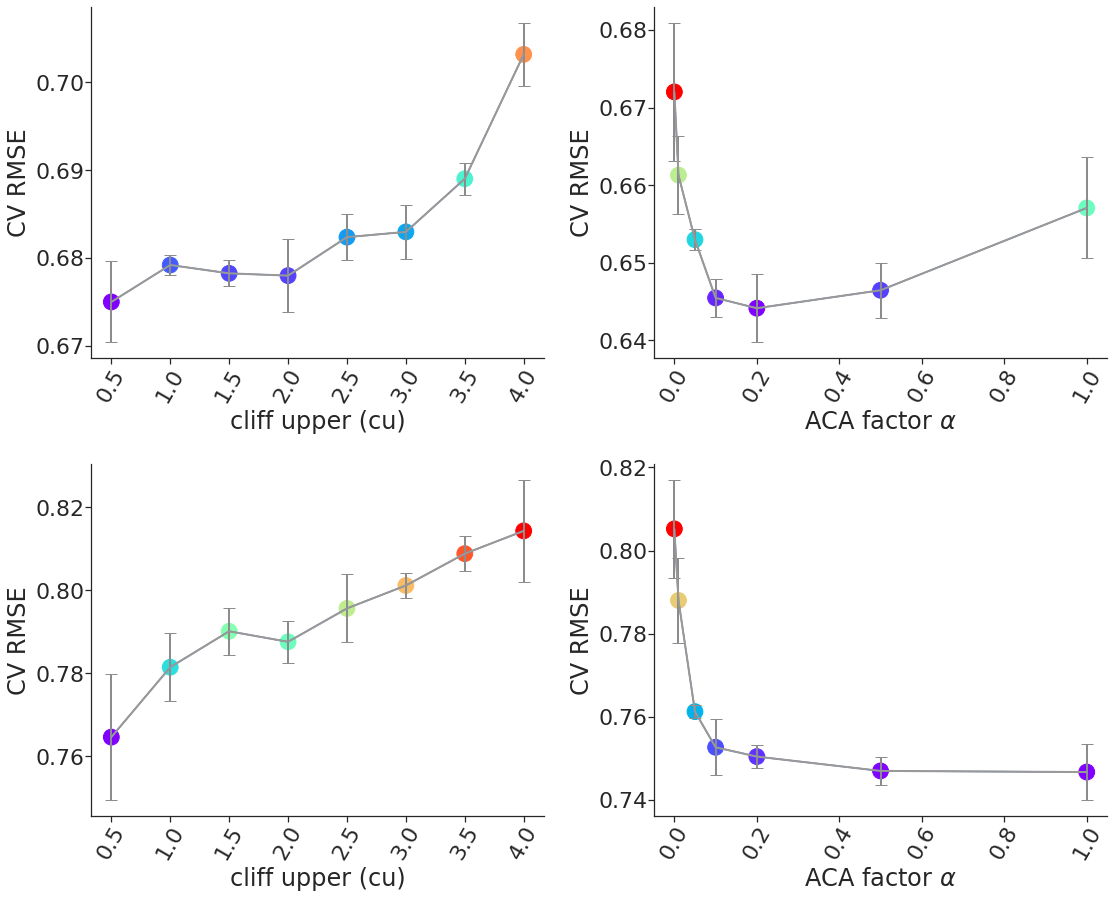

In [303]:
df1 = pd.read_csv('./benchmark_performance/mae_aca_opt_cliff/CHEMBL214_Ki/alpha_performance.csv', index_col=0)
df2 = pd.read_csv('./benchmark_performance/mae_aca_opt_cliff/CHEMBL4203_Ki/alpha_performance.csv', index_col=0)

df31 = pd.read_csv('./benchmark_performance/mae_aca_opt_cliff/CHEMBL214_Ki/cliff_performance.csv', index_col=0)
df41 = pd.read_csv('./benchmark_performance/mae_aca_opt_cliff/CHEMBL4203_Ki/cliff_performance.csv', index_col=0)
df3 = df31[df31.cl == 0.1]
df4 = df41[df41.cl == 0.1]



fig, axes = plt.subplots(2,2, figsize=(16, 13))
(ax1, ax2), (ax3, ax4) = axes
sns.despine(top=True, right=True, left=False, bottom=False)



# df1.alpha = df1.alpha.apply(lambda x:'%.e' % float(x))
# df2.alpha = df2.alpha.apply(lambda x:'%.e' % float(x))

ax2.plot(df1.alpha, df1.rmse)
ax2.scatter(df1.alpha, df1.rmse, c=df1.rmse, cmap='rainbow', s=250, alpha = 1, )
ax2.errorbar(df1.alpha, df1.rmse, yerr=df1.rmse_err, capsize = 6, ecolor='#8c8c8c', color = '#999999', lw=2)
ax2.set_xlabel(r'ACA factor $\alpha$')
ax2.set_ylabel('CV RMSE')
ax2.tick_params(left='off',  bottom='off', pad=.5,)
ax2.tick_params(axis='x', labelrotation=60)

ax4.plot(df2.alpha, df2.rmse)
ax4.scatter(df2.alpha, df2.rmse, c=df2.rmse, cmap='rainbow', s=250, alpha = 1)
ax4.errorbar(df2.alpha, df2.rmse, yerr=df2.rmse_err, capsize = 6, ecolor='#8c8c8c', color = '#999999', lw=2)
ax4.set_xlabel(r'ACA factor $\alpha$')
ax4.set_ylabel('CV RMSE')
ax4.tick_params(left='off',  bottom='off', pad=.5,)
ax4.tick_params(axis='x', labelrotation=60)




ax1.plot(df3.cu, df3.rmse)
ax1.scatter(df3.cu, df3.rmse, c=df3.rmse, cmap='rainbow', vmax = 0.71, s=250, alpha = 1)
ax1.errorbar(df3.cu, df3.rmse, yerr=df3.rmse_err, capsize = 6, ecolor='#8c8c8c', color = '#999999', lw=2)
ax1.set_xlabel(r'ACA factor $\alpha$')
ax1.set_ylabel('CV RMSE')
ax1.tick_params(left='off',  bottom='off', pad=.5,)
ax1.tick_params(axis='x', labelrotation=60)
ax1.set_xlabel('cliff upper (cu)')
ax1.set_xticks(df3.cu.tolist())


ax3.plot(df4.cu, df4.rmse)
ax3.scatter(df4.cu, df4.rmse, c=df4.rmse, cmap='rainbow', s=250, alpha = 1)
ax3.errorbar(df4.cu, df4.rmse, yerr=df4.rmse_err, capsize = 6, ecolor='#8c8c8c', color = '#999999', lw=2)

ax3.set_ylabel('CV RMSE')
ax3.tick_params(left='off',  bottom='off', pad=.5,)
ax3.tick_params(axis='x', labelrotation=60)
ax3.set_xlabel('cliff upper (cu)')
ax3.set_xticks(df4.cu.tolist())

plt.tight_layout()


fig.savefig('./benchmark_performance/clk4_5ht1a_cu_alpha.pdf', bbox_inches='tight', dpi=400) 

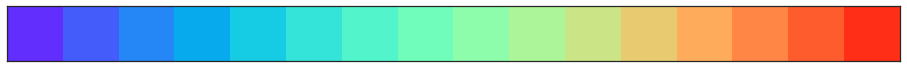

In [262]:
sns.palplot(sns.palettes.color_palette('rainbow', 16))

In [274]:
df4.rmse

0    0.764557
1    0.781407
2    0.790066
3    0.787524
4    0.795578
5    0.801099
6    0.808771
7    0.814255
Name: rmse, dtype: float64